In [16]:
#Imports
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.api as sm

In [2]:
#Read data
soiYield = pd.read_csv('DATA/crop_yield_plus_soi.csv')

In [3]:
soiYield.head(5)

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI
0,2023,147.0,41.0,167.0,45.0,70.0,bu / acre,1.28
1,2022,161.0,39.0,176.0,45.5,60.0,bu / acre,1.23
2,2021,159.0,39.0,179.0,49.0,65.0,bu / acre,1.40
3,2020,171.0,36.0,161.0,51.0,62.0,bu / acre,-0.15
4,2019,155.0,37.0,164.0,46.0,63.0,bu / acre,-0.17


In [4]:
soiYield.shape

(72, 8)

In [5]:
soiYield.index

RangeIndex(start=0, stop=72, step=1)

In [9]:
#Add new column to soiYield dataframe: SOI phase
phase = []

for i in soiYield.index:
    if soiYield['DJFM Mean SOI'][i] < 0:
        phase.append('El Nino')
    elif soiYield['DJFM Mean SOI'][i] > 0:
        phase.append('La Nina')
    else:
        phase.append('Neutral')

soiYield['SOI phase'] = phase

In [10]:
soiYield.head()

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI,SOI phase
0,2023,147.0,41.0,167.0,45.0,70.0,bu / acre,1.28,La Nina
1,2022,161.0,39.0,176.0,45.5,60.0,bu / acre,1.23,La Nina
2,2021,159.0,39.0,179.0,49.0,65.0,bu / acre,1.40,La Nina
3,2020,171.0,36.0,161.0,51.0,62.0,bu / acre,-0.15,El Nino
4,2019,155.0,37.0,164.0,46.0,63.0,bu / acre,-0.17,El Nino


In [11]:
#Summarize yield data by SOI phase 
soiYield.groupby(by='SOI phase')['Corn Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
SOI phase,,,,,,,,
El Nino,30.0,94.716667,38.322066,33.5,61.25,96.0,117.00,171.0
La Nina,40.0,103.200000,41.831898,23.0,67.50,102.0,138.50,186.0
Neutral,2.0,86.500000,14.849242,76.0,81.25,86.5,91.75,97.0


In [12]:
soiYield.groupby(by='SOI phase')['Cotton Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
SOI phase,,,,,,,,
El Nino,30.0,20.833333,8.213040,11.0,14.25,17.5,27.0,37.0
La Nina,40.0,23.150000,9.409624,9.0,17.00,20.0,30.0,43.0
Neutral,2.0,17.000000,4.242641,14.0,15.50,17.0,18.5,20.0


In [13]:
soiYield.groupby(by='SOI phase')['Rice Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
SOI phase,,,,,,,,
El Nino,30.0,110.066667,30.285917,54.0,93.75,105.5,132.00,164.0
La Nina,40.0,118.375000,33.420159,58.0,93.75,115.0,147.50,179.0
Neutral,2.0,97.500000,21.920310,82.0,89.75,97.5,105.25,113.0


In [14]:
soiYield.groupby(by='SOI phase')['Soybean Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
SOI phase,,,,,,,,
El Nino,30.0,30.800,9.030217,13.5,25.125,29.50,37.375,51.0
La Nina,40.0,31.775,9.495579,14.5,23.625,30.75,38.000,49.5
Neutral,2.0,31.250,1.060660,30.5,30.875,31.25,31.625,32.0


In [15]:
soiYield.groupby(by='SOI phase')['Wheat Yield'].describe()

,count,mean,std,min,25%,50%,75%,max
SOI phase,,,,,,,,
El Nino,30.0,41.6000,12.150919,22.0,31.875,40.5,47.50,70.0
La Nina,40.0,43.6125,12.615359,23.0,33.000,42.5,54.00,70.0
Neutral,2.0,35.5000,4.949747,32.0,33.750,35.5,37.25,39.0


In [21]:
#separate yield data into SOI phases: El Nino & La Nina 
elNino = soiYield[soiYield['SOI phase'] == 'El Nino']
laNina = soiYield[soiYield['SOI phase'] == 'La Nina']

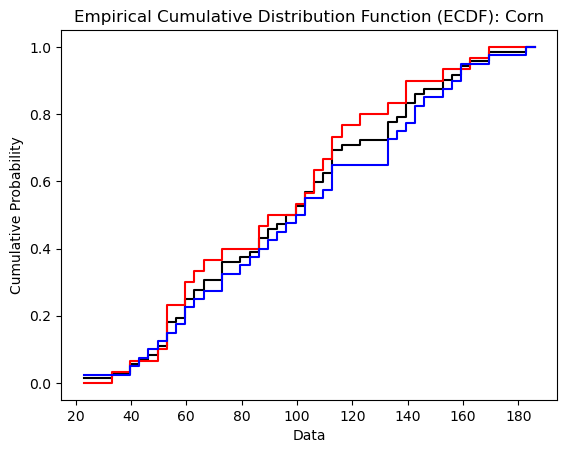

In [25]:
#Explore crop yield data through ECDFs 
ecdf_corn = sm.distributions.ECDF(soiYield['Corn Yield'])
x_corn = np.linspace(min(soiYield['Corn Yield']), max(soiYield['Corn Yield']))

ecdf_corn_en = sm.distributions.ECDF(elNino['Corn Yield'])
ecdf_corn_ln = sm.distributions.ECDF(laNina['Corn Yield'])

plt.step(x_corn, ecdf_corn(x_corn),color='black')
plt.step(x_corn, ecdf_corn_en(x_corn),color='red')
plt.step(x_corn, ecdf_corn_ln(x_corn),color='blue')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF): Corn')
plt.show()

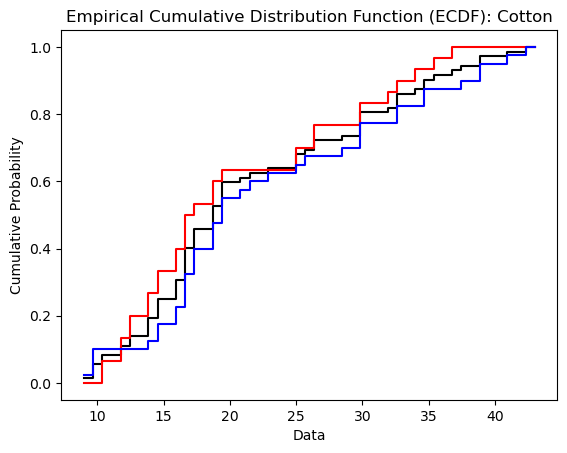

In [26]:
ecdf_cotton = sm.distributions.ECDF(soiYield['Cotton Yield'])
x_cotton = np.linspace(min(soiYield['Cotton Yield']), max(soiYield['Cotton Yield']))

ecdf_cotton_en = sm.distributions.ECDF(elNino['Cotton Yield'])
ecdf_cotton_ln = sm.distributions.ECDF(laNina['Cotton Yield'])

plt.step(x_cotton, ecdf_cotton(x_cotton),color='black')
plt.step(x_cotton, ecdf_cotton_en(x_cotton),color='red')
plt.step(x_cotton, ecdf_cotton_ln(x_cotton),color='blue')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF): Cotton')
plt.show()

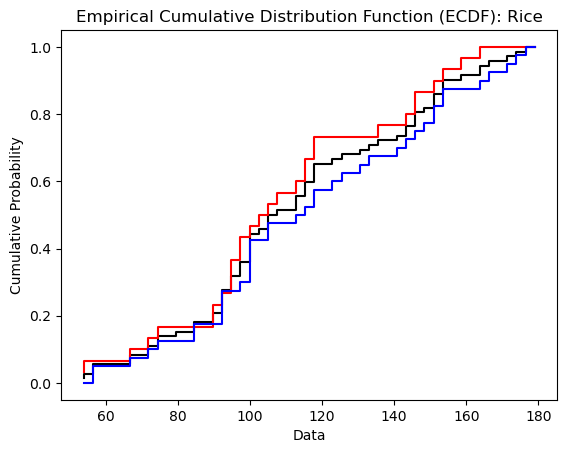

In [27]:
ecdf_rice = sm.distributions.ECDF(soiYield['Rice Yield'])
x_rice = np.linspace(min(soiYield['Rice Yield']), max(soiYield['Rice Yield']))

ecdf_rice_en = sm.distributions.ECDF(elNino['Rice Yield'])
ecdf_rice_ln = sm.distributions.ECDF(laNina['Rice Yield'])

plt.step(x_rice, ecdf_rice(x_rice),color='black')
plt.step(x_rice, ecdf_rice_en(x_rice),color='red')
plt.step(x_rice, ecdf_rice_ln(x_rice),color='blue')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF): Rice')
plt.show()

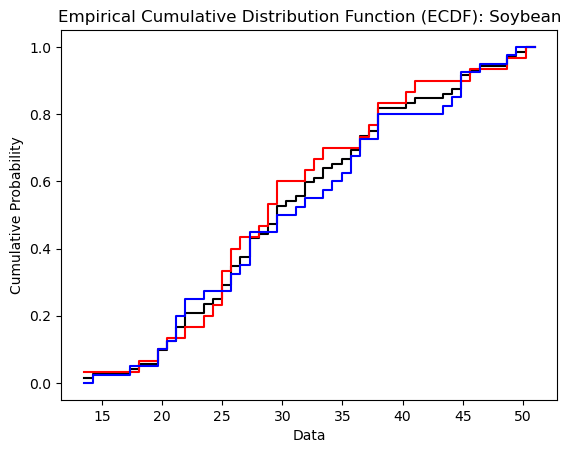

In [28]:
ecdf_soybean = sm.distributions.ECDF(soiYield['Soybean Yield'])
x_soybean = np.linspace(min(soiYield['Soybean Yield']), max(soiYield['Soybean Yield']))

ecdf_soybean_en = sm.distributions.ECDF(elNino['Soybean Yield'])
ecdf_soybean_ln = sm.distributions.ECDF(laNina['Soybean Yield'])

plt.step(x_soybean, ecdf_soybean(x_soybean),color='black')
plt.step(x_soybean, ecdf_soybean_en(x_soybean),color='red')
plt.step(x_soybean, ecdf_soybean_ln(x_soybean),color='blue')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF): Soybean')
plt.show()

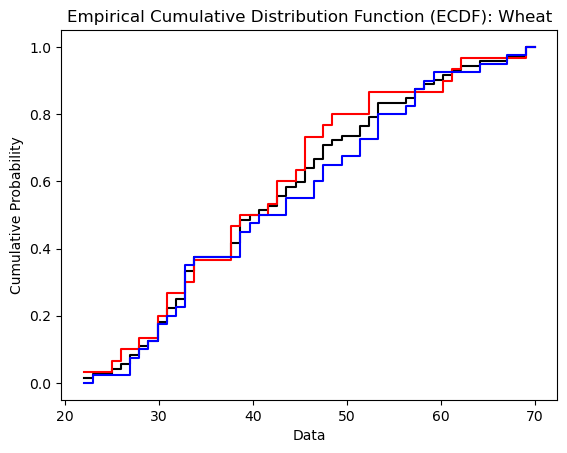

In [29]:
ecdf_wheat = sm.distributions.ECDF(soiYield['Wheat Yield'])
x_wheat = np.linspace(min(soiYield['Wheat Yield']), max(soiYield['Wheat Yield']))

ecdf_wheat_en = sm.distributions.ECDF(elNino['Wheat Yield'])
ecdf_wheat_ln = sm.distributions.ECDF(laNina['Wheat Yield'])

plt.step(x_wheat, ecdf_wheat(x_wheat),color='black')
plt.step(x_wheat, ecdf_wheat_en(x_wheat),color='red')
plt.step(x_wheat, ecdf_wheat_ln(x_wheat),color='blue')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF): Wheat')
plt.show()

In [35]:
#Explore crop yield data through boxplots 
soiYield2 = soiYield[soiYield['SOI phase'] != 'Neutral']

<Axes: title={'center': 'Corn Yield'}, xlabel='SOI phase'>

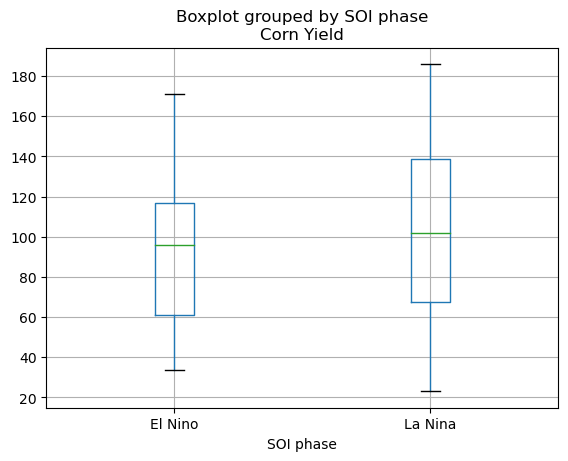

In [41]:
soiYield2.boxplot(by='SOI phase',column='Corn Yield', grid=True)

<Axes: title={'center': 'Cotton Yield'}, xlabel='SOI phase'>

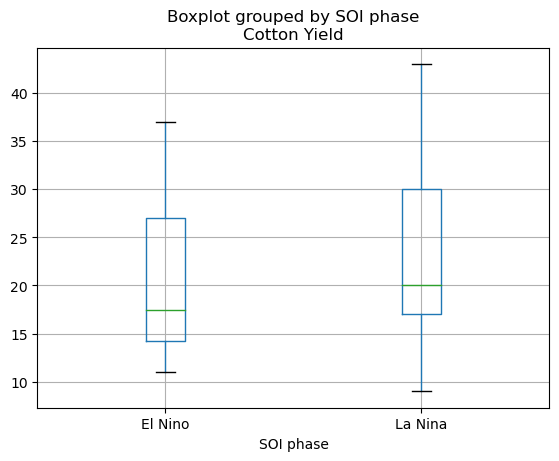

In [42]:
soiYield2.boxplot(by='SOI phase',column='Cotton Yield', grid=True)

<Axes: title={'center': 'Rice Yield'}, xlabel='SOI phase'>

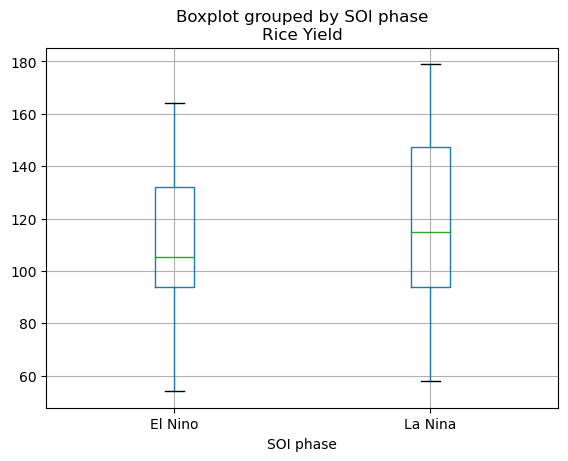

In [43]:
soiYield2.boxplot(by='SOI phase',column='Rice Yield', grid=True)

<Axes: title={'center': 'Soybean Yield'}, xlabel='SOI phase'>

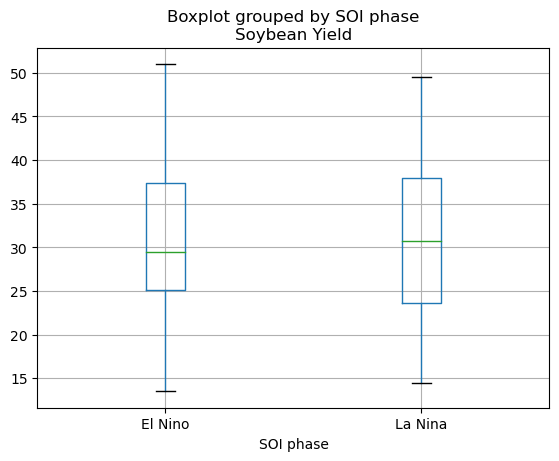

In [44]:
soiYield2.boxplot(by='SOI phase',column='Soybean Yield', grid=True)

<Axes: title={'center': 'Wheat Yield'}, xlabel='SOI phase'>

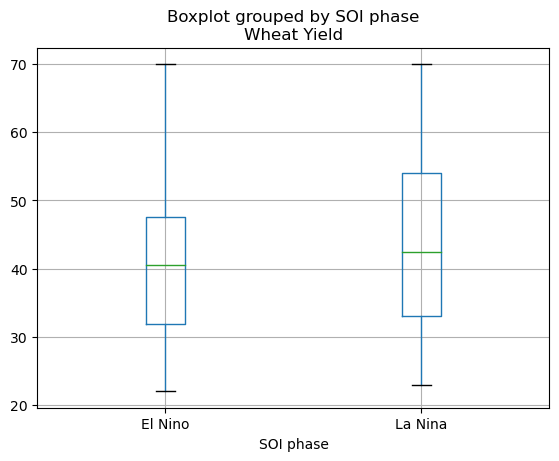

In [45]:
soiYield2.boxplot(by='SOI phase',column='Wheat Yield', grid=True)

In [66]:
soiYield_sorted = soiYield.sort_values(by='SOI phase')

In [67]:
soiYield_sorted.head()

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI,SOI phase
35,1988,76.0,19.0,113.0,26.5,49.0,bu / acre,-0.10,El Nino
29,1994,118.0,27.0,116.0,38.0,45.0,bu / acre,-0.07,El Nino
30,1993,90.0,17.0,109.0,33.0,38.0,bu / acre,-0.68,El Nino
31,1992,135.0,25.0,107.0,38.0,48.0,bu / acre,-1.90,El Nino
33,1990,105.0,20.0,104.0,30.0,38.0,bu / acre,-0.70,El Nino


In [68]:
soiYield_sorted.tail()

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI,SOI phase
9,2014,186.0,35.0,152.0,46.5,58.0,bu / acre,0.18,La Nina
21,2002,105.0,25.0,134.0,34.0,44.0,bu / acre,0.12,La Nina
37,1986,116.0,18.0,114.0,32.5,33.0,bu / acre,0.17,La Nina
32,1991,97.0,20.0,113.0,30.5,32.0,bu / acre,0.00,Neutral
46,1977,76.0,14.0,82.0,32.0,39.0,bu / acre,0.00,Neutral


In [72]:
#Remove the two 'Neutral' years, leaving only El Nino and La Nina phases 
soiYield_sorted = soiYield_sorted[soiYield_sorted['SOI phase'] != 'Neutral'].reset_index(drop=True)

In [75]:
soiYield_sorted.head()

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI,SOI phase
0,1988,76.0,19.0,113.0,26.5,49.0,bu / acre,-0.10,El Nino
1,1994,118.0,27.0,116.0,38.0,45.0,bu / acre,-0.07,El Nino
2,1993,90.0,17.0,109.0,33.0,38.0,bu / acre,-0.68,El Nino
3,1992,135.0,25.0,107.0,38.0,48.0,bu / acre,-1.90,El Nino
4,1990,105.0,20.0,104.0,30.0,38.0,bu / acre,-0.70,El Nino


In [73]:
soiYield_sorted.tail()

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI,SOI phase
65,2013,136.0,30.0,156.0,36.0,57.0,bu / acre,0.15,La Nina
66,1979,103.0,17.0,85.0,31.5,44.0,bu / acre,0.15,La Nina
67,2014,186.0,35.0,152.0,46.5,58.0,bu / acre,0.18,La Nina
68,2002,105.0,25.0,134.0,34.0,44.0,bu / acre,0.12,La Nina
69,1986,116.0,18.0,114.0,32.5,33.0,bu / acre,0.17,La Nina


In [76]:
print(len(soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']))

30


In [77]:
print(len(soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']))

40


In [80]:
print(soiYield_sorted.iloc[29])

Year                  2019
Corn Yield           155.0
Cotton Yield          37.0
Rice Yield           164.0
Soybean Yield         46.0
Wheat Yield           63.0
Yield Units      bu / acre
DJFM Mean SOI        -0.17
SOI phase          El Nino
Name: 29, dtype: object


In [81]:
print(soiYield_sorted.iloc[30])

Year                  2001
Corn Yield           133.0
Cotton Yield          26.0
Rice Yield           133.0
Soybean Yield         38.0
Wheat Yield           54.0
Yield Units      bu / acre
DJFM Mean SOI          1.1
SOI phase          La Nina
Name: 30, dtype: object


In [82]:
soiYield_sorted.index

RangeIndex(start=0, stop=70, step=1)

In [84]:
print(soiYield_sorted.iloc[69])

Year                  1986
Corn Yield           116.0
Cotton Yield          18.0
Rice Yield           114.0
Soybean Yield         32.5
Wheat Yield           33.0
Yield Units      bu / acre
DJFM Mean SOI         0.17
SOI phase          La Nina
Name: 69, dtype: object


In [ ]:
#HYPOTHESIS FORMULATION

#Null Hypothesis: The observed difference in the mean yield of corn, cotton, rice, soybean, and wheat following 
#                 El Nino & La Nina winters is due to randomness/chance.
#
#Alternate Hypothesis: The observed difference in the mean yield of corn, cotton, rice, soybean, and wheat 
#                      following El Nino and La Nina winters is not due to randomness/chance (i.e., the 
#                      observed difference is actually due to the ENSO phase)
#
#Hypothesis Testing: Permutation tests using the difference of mean yeild between El Nino & La Nina growing 
#                    seasons as the test statistic 

In [139]:
#Define function to calculate difference of means
def diff_of_mean(input1,input2):
    
    diff = np.mean(input1) - np.mean(input2)
    return diff 

In [152]:
#Define function to calculate difference of medians
def diff_of_median(input1,input2):
    
    diff = np.median(input1) - np.median(input2)
    return diff

In [140]:
#Define function to draw permutation sample 
def permutation_sample(data1, data2):
    
    data_concat = pd.concat([data1,data2])
    
    permuted_data = np.random.permutation(data_concat)
    
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data2):]
    
    return perm_sample1, perm_sample2

In [141]:
#Define function to draw permutation replicates 
def draw_perm_reps(data_1, data_2, func, size=1):
    
    perm_replicates = np.empty(size)
    
    for i in range(size):
        
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

In [179]:
#Permutation test for corn 
obs_diff_mean_corn = np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Corn Yield']) - \
                     np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Corn Yield'])

In [180]:
data_1 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Corn Yield']
data_2 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Corn Yield']

perm_replicates_corn_mean = draw_perm_reps(data_1, data_2, diff_of_mean, 10000)

In [181]:
p_value_corn_mean = np.sum(abs(perm_replicates_corn_mean) >= abs(obs_diff_mean_corn)) / len(perm_replicates_corn_mean)

In [182]:
print('p-value for corn: ',p_value_corn_mean)

p-value for corn:  0.423


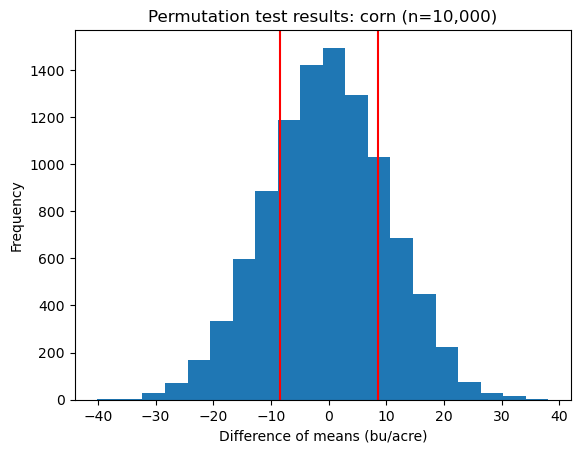

In [187]:
_ = plt.hist(x=perm_replicates_corn_mean, bins=20)
plt.axvline(x = obs_diff_mean_corn, color = 'red')
plt.axvline(x = abs(obs_diff_mean_corn), color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Difference of means (bu/acre)')
plt.title('Permutation test results: corn (n=10,000)')
plt.show()

In [185]:
#Permutation test for cotton
obs_diff_mean_cotton = np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Cotton Yield']) - \
                       np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Cotton Yield'])

data_1 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Cotton Yield']
data_2 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Cotton Yield']

perm_replicates_cotton_mean = draw_perm_reps(data_1, data_2, diff_of_mean, 10000)

p_value_cotton_mean = np.sum(abs(perm_replicates_cotton_mean) >= abs(obs_diff_mean_cotton)) / len(perm_replicates_cotton_mean)

print('p-value for cotton: ',p_value_cotton_mean)

p-value for cotton:  0.3135


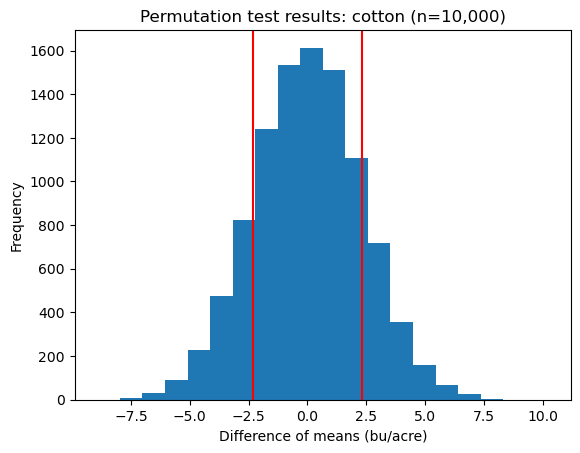

In [188]:
_ = plt.hist(x=perm_replicates_cotton_mean, bins=20)
plt.axvline(x = obs_diff_mean_cotton, color = 'red')
plt.axvline(x = abs(obs_diff_mean_cotton), color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Difference of means (bu/acre)')
plt.title('Permutation test results: cotton (n=10,000)')
plt.show()

In [189]:
#Permutation test for rice 
obs_diff_mean_rice = np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Rice Yield']) - \
                     np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Rice Yield'])

data_1 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Rice Yield']
data_2 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Rice Yield']

perm_replicates_rice_mean = draw_perm_reps(data_1, data_2, diff_of_mean, 10000)

p_value_rice_mean = np.sum(abs(perm_replicates_rice_mean) >= abs(obs_diff_mean_rice)) / len(perm_replicates_rice_mean)

print('p-value for rice: ',p_value_rice_mean)

p-value for rice:  0.3268


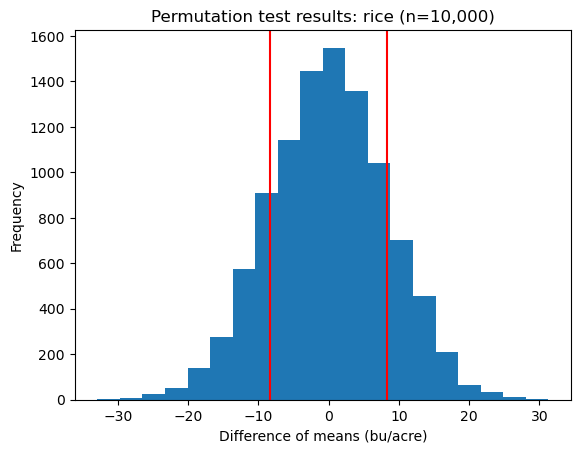

In [190]:
_ = plt.hist(x=perm_replicates_rice_mean, bins=20)
plt.axvline(x = obs_diff_mean_rice, color = 'red')
plt.axvline(x = abs(obs_diff_mean_rice), color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Difference of means (bu/acre)')
plt.title('Permutation test results: rice (n=10,000)')
plt.show()

In [192]:
#Permutation test for soybeans 
obs_diff_mean_soybean = np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Soybean Yield']) - \
                        np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Soybean Yield'])

data_1 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Soybean Yield']
data_2 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Soybean Yield']

perm_replicates_soybean_mean = draw_perm_reps(data_1, data_2, diff_of_mean, 10000)

p_value_soybean_mean = np.sum(abs(perm_replicates_soybean_mean) >= abs(obs_diff_mean_soybean)) / len(perm_replicates_soybean_mean)

print('p-value for soybeans: ',p_value_soybean_mean)

p-value for soybeans:  0.6841


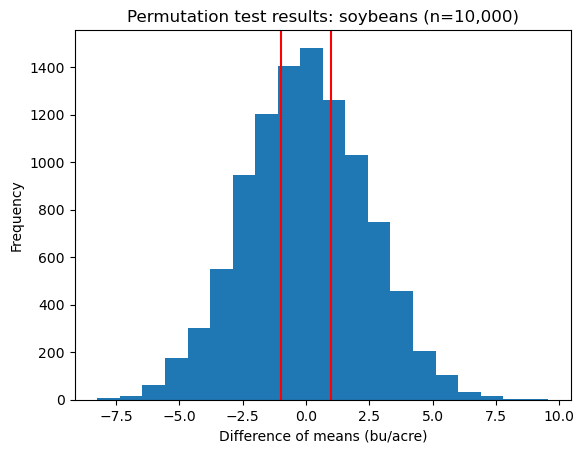

In [193]:
_ = plt.hist(x=perm_replicates_soybean_mean, bins=20)
plt.axvline(x = obs_diff_mean_soybean, color = 'red')
plt.axvline(x = abs(obs_diff_mean_soybean), color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Difference of means (bu/acre)')
plt.title('Permutation test results: soybeans (n=10,000)')
plt.show()

In [194]:
#Permutation test for wheat 
obs_diff_mean_wheat = np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Wheat Yield']) - \
                      np.mean(soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Wheat Yield'])

data_1 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'El Nino']['Wheat Yield']
data_2 = soiYield_sorted[soiYield_sorted['SOI phase'] == 'La Nina']['Wheat Yield']

perm_replicates_wheat_mean = draw_perm_reps(data_1, data_2, diff_of_mean, 10000)

p_value_wheat_mean = np.sum(abs(perm_replicates_wheat_mean) >= abs(obs_diff_mean_wheat)) / len(perm_replicates_wheat_mean)

print('p-value for wheat: ',p_value_wheat_mean)

p-value for wheat:  0.5244


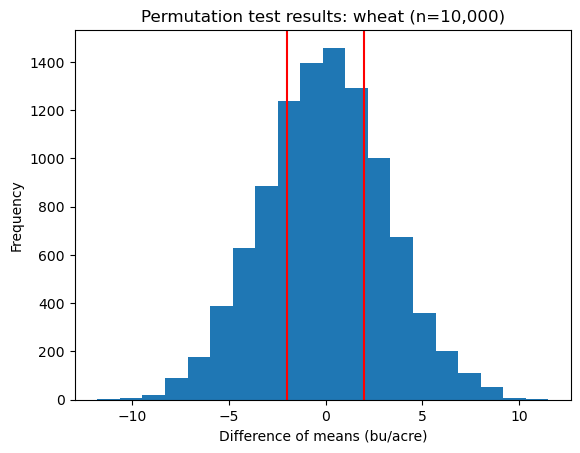

In [195]:
_ = plt.hist(x=perm_replicates_wheat_mean, bins=20)
plt.axvline(x = obs_diff_mean_wheat, color = 'red')
plt.axvline(x = abs(obs_diff_mean_wheat), color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Difference of means (bu/acre)')
plt.title('Permutation test results: wheat (n=10,000)')
plt.show()

In [199]:
#PRELIMINARY CONCLUSION

#In all cases, based on the p-values, the null hypothesis is accepted that the observed differences in 
#the mean yield of corn, cotton, rice, soybean, and wheat following El Nino and La Nina winters are due
#randomness/chance (NOT due to the particular ENSO phase)

print('p-value for corn   : ',round(p_value_corn_mean,2))
print('p-value for cotton : ',round(p_value_cotton_mean,2))
print('p-value for rice   : ',round(p_value_rice_mean,2))
print('p-value for soybean: ',round(p_value_soybean_mean,2))
print('p-value for wheat  : ',round(p_value_wheat_mean,2))


p-value for corn   :  0.42
p-value for cotton :  0.31
p-value for rice   :  0.33
p-value for soybean:  0.68
p-value for wheat  :  0.52


In [ ]:
#FURTHER PONDERINGS
#
#1) Perhaps farmers are mitigating for the effects of the ENSO cycle (El Nino or La Nina) on the following
#   growing season.  In this case, for proper mitigation, the ENSO signal should be nonexistent or small in 
#   the overall crop yield data (which is exactly what the results show).  Additionally, the ENSO signal may
#   be present in the mitigating factors (e.g., amount of irrigation, initail planting date, final planting 
#   date, soil characteristics, etc.)
#
#2) ENSO forcasting has improved over time, thus mitigation practices have evolved/developed over time too.
#   Consequently, the ENSO signal in the crop yield data may be stronger in the earlier decades of the 
#   dataset than for more recent decades.  This can probably be easily tested through ECDF plots by decade??